# **A data-driven approach to predict the success of bank telemarketing**

Student Name: Paul Fagan

Student Number: 23254777

### Objective and dataset


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### **Data Dictionary**

Input variables:

**bank client data:**
- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**
- contact: contact communication type (categorical: "unknown","telephone","cellular") 
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

**other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
- subscribed: has the client subscribed a term deposit? (binary: "yes","no")

## A. Importing Modules and Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Task1: EDA**
  
- Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).


- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).


- Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).


- Make sure your conclusions are related to the question you have formulated.


- Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).
  - **What do know about the outreach strategy of the company?**
  - **How does bank balance vary by education and job**
  


In [52]:
df1 = pd.read_csv('bank.csv')

## B. Quick Data Exploration


In [374]:
df1.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [375]:
df1.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [376]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


**Observations:**

- There are **2000 entries and 17 columns** in the data.
- The columns are **both numeric (7)  and categorical (10)**
- There are **missing values** in the data for **age, job, education, contact  and outcome**

#### B.1. Quick Examination of Numerical Attributes

In [56]:
df1.describe().T

count         mean          std    min     25%    50%     75%  \
age       1988.0    41.753018    12.724358   18.0   32.00   38.0    50.0   
balance   2000.0  1413.663500  3131.224213 -980.0  201.50  551.0  1644.5   
day       2000.0    13.851500     9.712189    1.0    5.00   12.0    23.0   
duration  2000.0   292.020500   221.557295    7.0  146.00  236.0   379.0   
campaign  2000.0     1.909500     1.378862    1.0    1.00    1.0     2.0   
pdays     2000.0   167.896000   131.754126   -1.0   75.75  182.0   251.0   
previous  2000.0     2.561500     3.400735    0.0    1.00    2.0     3.0   

              max  
age          93.0  
balance   81204.0  
day          31.0  
duration   1823.0  
campaign     11.0  
pdays       854.0  
previous     55.0

In [377]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'pdays', 'previous']

central_tendency = pd.DataFrame({
    'Median': df1[numerical_cols].median().round(2),
    'Mean': df1[numerical_cols].mean().round(2)
})

# Print the results
print(central_tendency)

          Median     Mean
age         38.0    41.75
balance    551.0  1413.66
day         12.0    13.85
duration   236.0   292.02
pdays      182.0   167.90
previous     2.0     2.56


**High-level Observations:**

Bank Client Data
- `Age`: 
  - 41 is the mean average age of a person interested in applying to bank term deposit. 
  - The mean is applicable here as the median is 38 years old
- `Balance`: 
  - 1413 euros is the mean average account balance. 
  - However, the median is 551, with a wide range of variation.  
  - I also note the minimum balance is -980. 

Campaign data
- `Day`:The average contact day was the 14th
- `Duration`: The last call lasted in average 292 secs
- `Campaign`: The average number of contacts performed during this campaign and for this client is 1.9
- `Pdays`: 167.8 number of days that passed by after the client was last contacted from a previous campaign

Other attribtues:
- `Previous`: 3.4 number of contacts performed before this campaign and for this client (numeric)


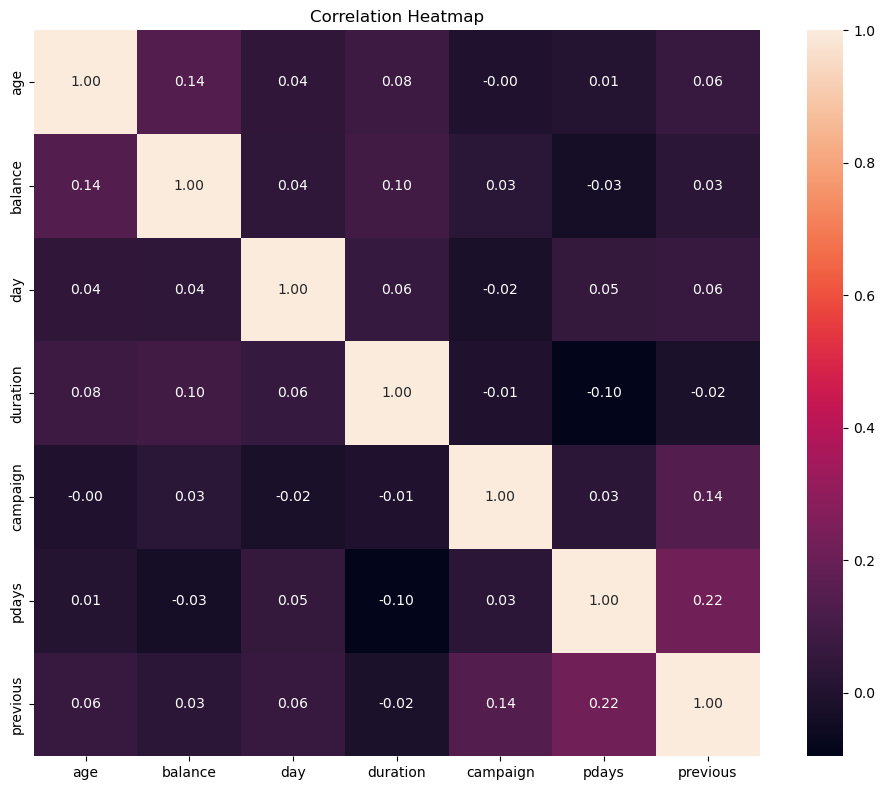

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Extract numeric data from DataFrame
numeric_data = df1[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Observations:**


In order to interpret the size of the correlation coffefficients I'll be using the follow rule of thumb taken from Hinkle DE, Wiersma W, Jurs SG. Applied Statistics for the Behavioral Sciences. 5th ed. Boston: Houghton Mifflin; 2003.

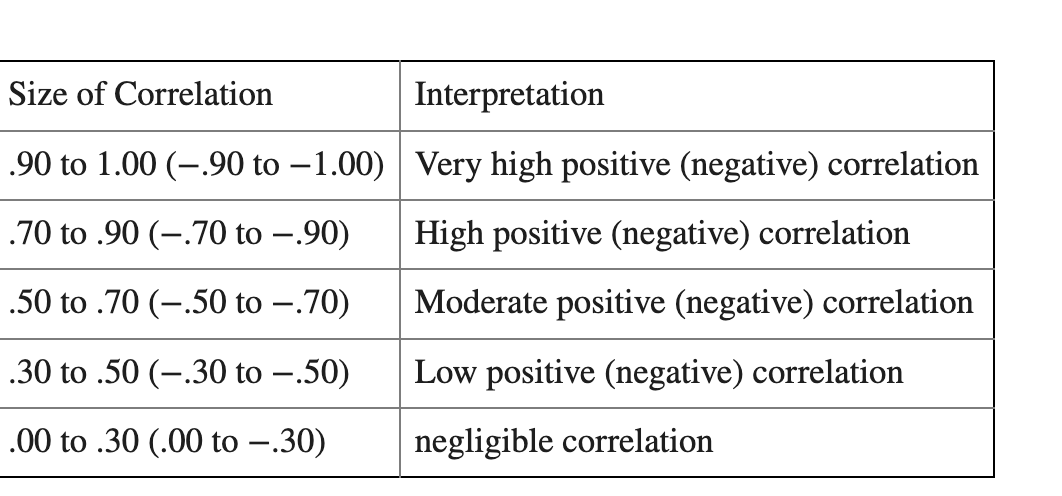


Based on this crtieria, all of the coefficients are low. 

*positive correlations*

The advertising campaign variables show weak/negligible positive correlation:
- The  most positive correlated relationshp is between `pdays` and `previous` at 22%. i.e.  how long since last contact and how often a client was contacted in previous campaigns. 
  - Interpretation: Its unclear how to interpret this in a meaningful way. It seems if we've contacted people frequently in the past, we've allowed more time to pass before the next contact. Are those people less important to our strategy? 

- We see `campaign` and `previous` are the second most correlated (14%). i.e. How often a client was contacted in previous campaigns how often they were contacted for this cammpaign. 
  - Interpretation: This makes more sense to me.  We may tend to contact the same people across campaigns. 

- A persons bank `balance` and their `age` is correlated at 14%.  
  - Interpretation: Its unsurprising to me that  older clients migh  have more money as people accumulate weath over time. 

- The duration of the call is also correlated with a persons bank balance `balance` and `duration` at 10%. 
  - Interpretation: Perhaps customer service agents spend more time with wealthier clients? Maybe they have more complex requests?

*negative  correlations*
- `pdays` and `duration` shows a weak/negligible correlation of  (-10%). 
  - Interpretation: We tend towards shorter calls for the clients who havent been contacted in a while. Maybe this is a deliberate strategy or maybe these clients are less responsive.
  
 


### Q1.a What does this tell us about the outreach strategy of the company? 

- **Heavy re-engagement focus**: It looks like company reps prioritize familiar clients who we've frequently contacted from previous campaigns but are no active.  

- **Uncertain effectivenes**: The shorter calls and low coefficients suggest that the effectiveness of this stategy is unclear at best.




/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

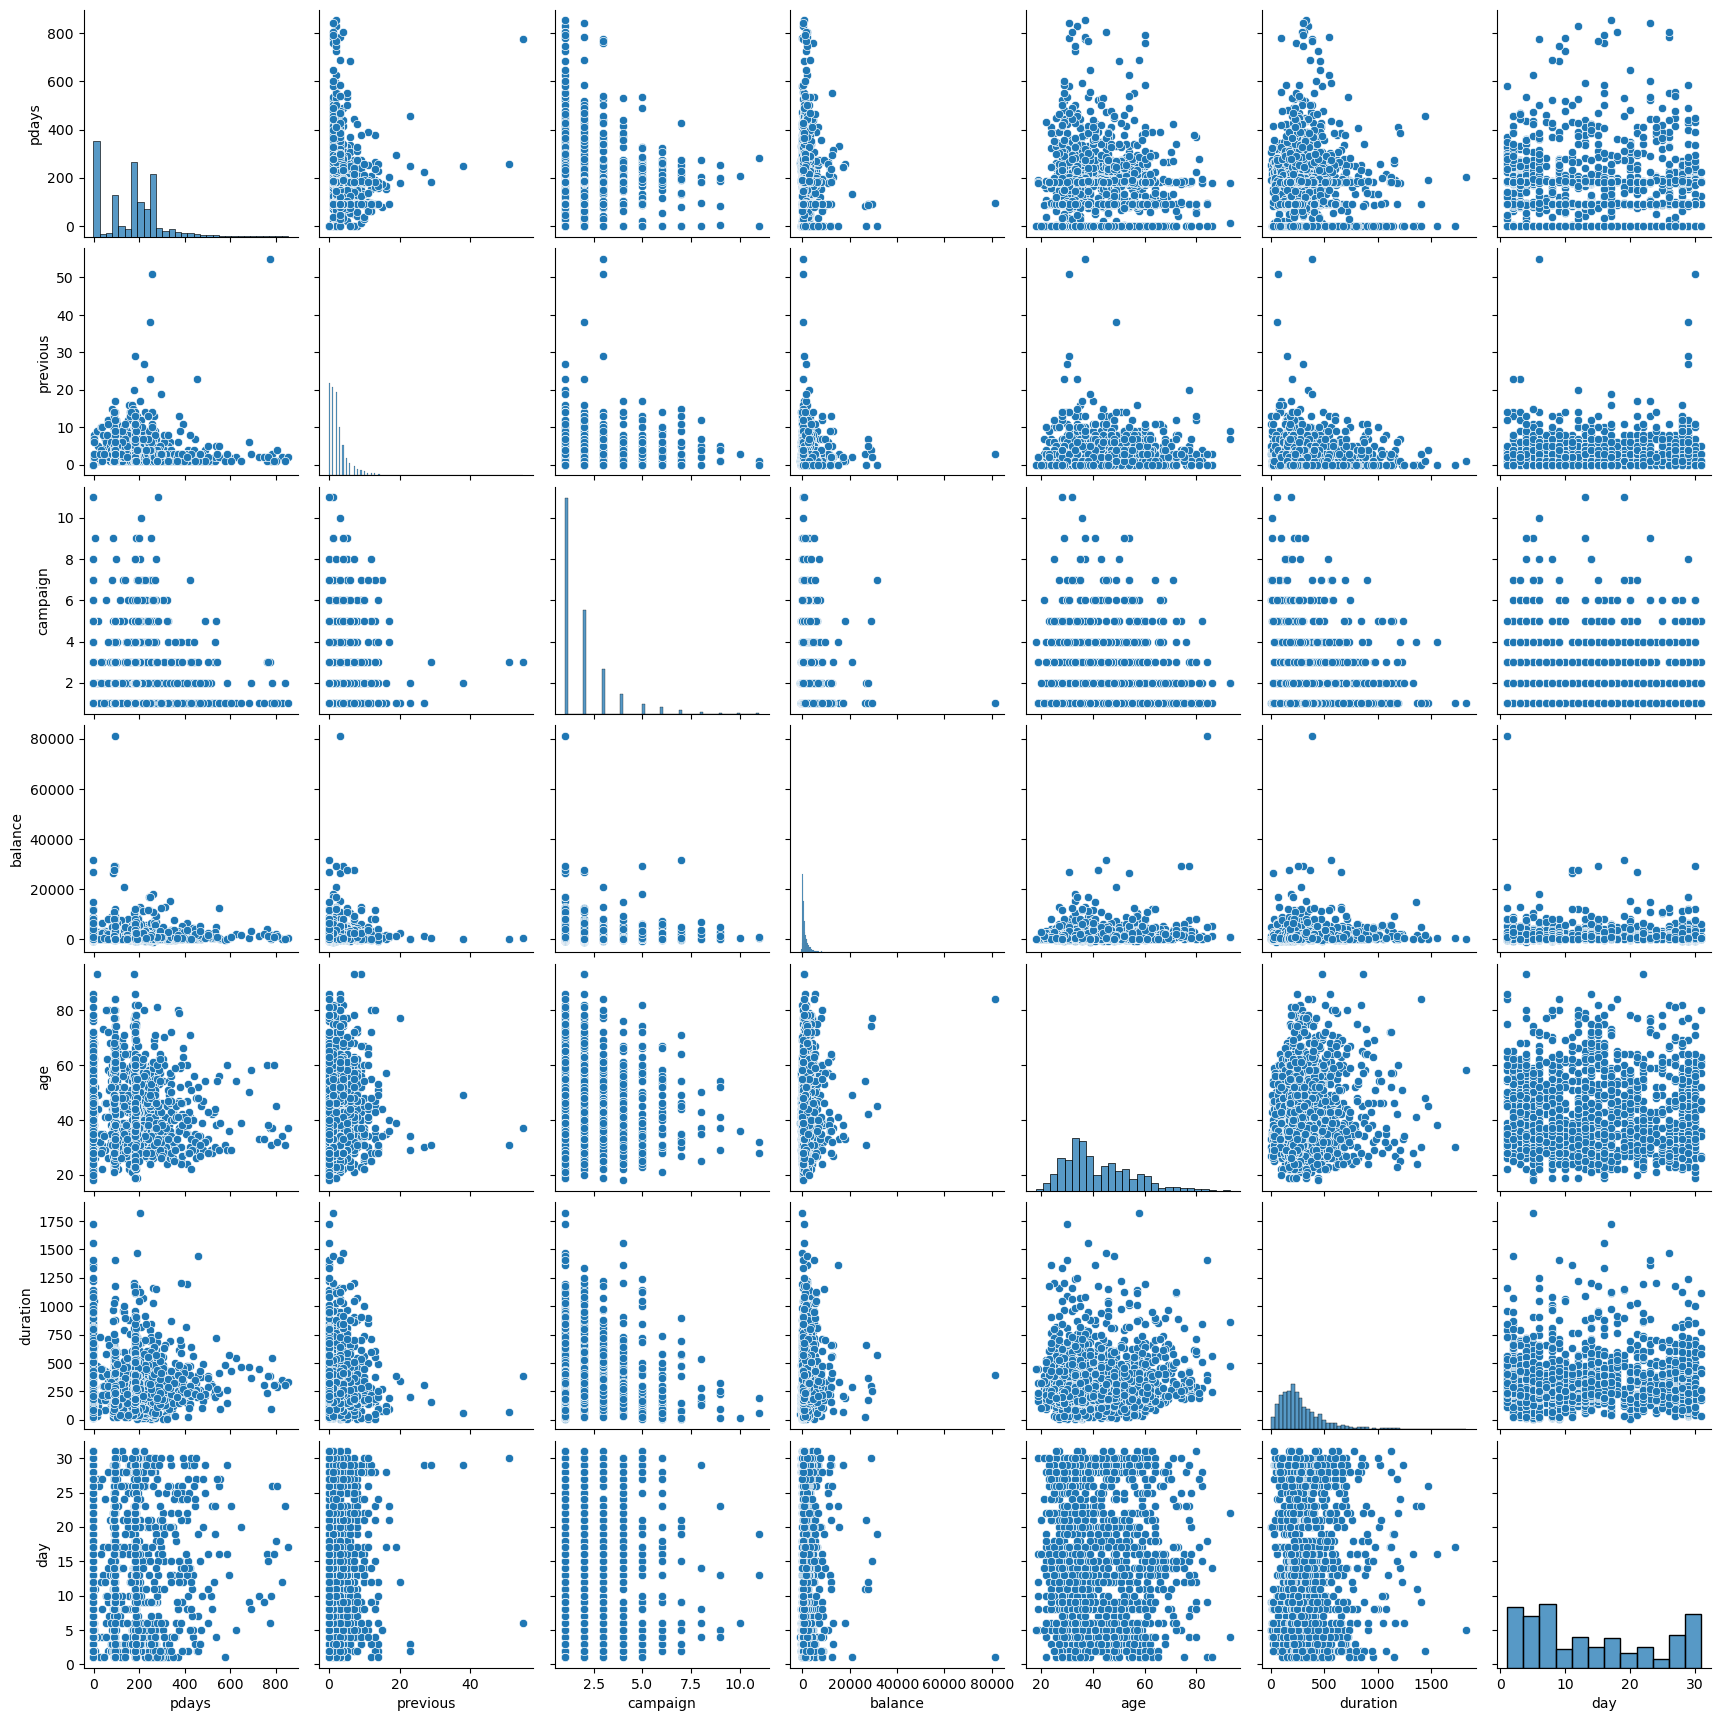

In [58]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df1[['pdays','previous','campaign','balance', 'age', 'duration','day' ]].dropna())
plt.show()

**Observations:**


#### B.2. Quick Examination of Categorical Attributes

In [59]:
categorical = df1.dtypes[df.dtypes == 'object'].index.tolist()
print("Categorical Variables:")
for col in categorical:
    print(col)

Categorical Variables:
job
marital
education
default
housing
loan
contact
month
poutcome
subscribed


## C. Distribution Analysis for Numerical Atributes (with some categorical comparisons)

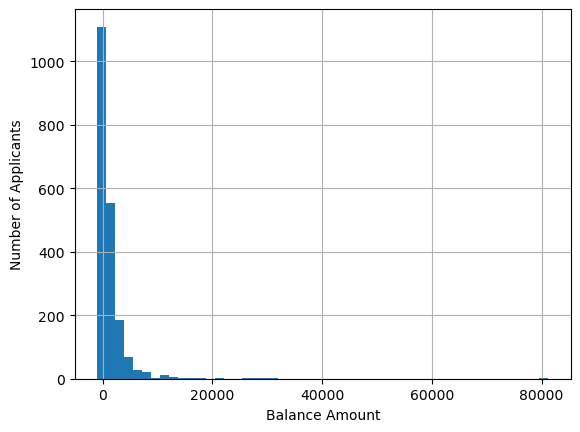

In [60]:
df1['balance'].hist(bins=50)
plt.xlabel('Balance Amount')
plt.ylabel('Number of Applicants')
plt.show()

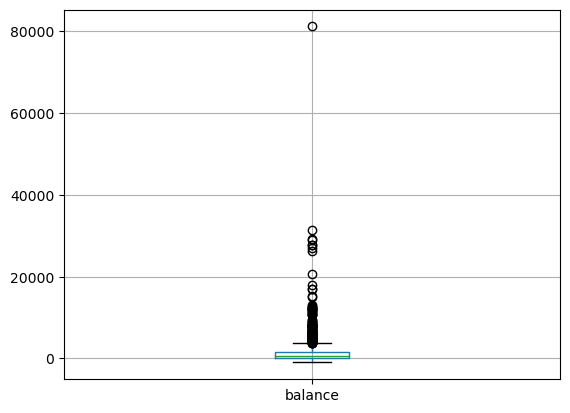

In [61]:
df1.boxplot(column='balance')
plt.show()

In [62]:
balance_values= df1['balance'].values

Q1,Q3 = np.percentile(balance_values,[25,75])

IQR =  Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
                      

num_outliers = np.sum((balance_values<lower_bound)| balance_values>upper_bound)

total_points = 2000
percentage_outliers = (num_outliers / total_points) * 100

print("Number of outliers in balance amount:",num_outliers)
print("Percentage of outliers in balance: {:.2f}%".format(percentage_outliers))


Number of outliers in balance amount: 158
Percentage of outliers in balance: 7.90%


**Observations:**

- We see there are quite a few outliers **(158)**  in the balance data, although this represents a relatively small percentage of the total **(7.9%)**

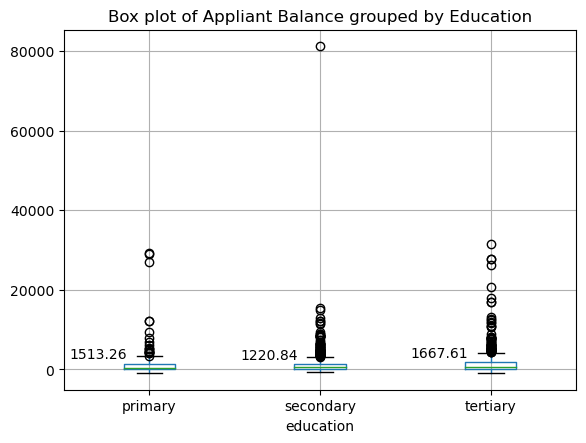

In [63]:
mean_balance_education = df1.groupby('education')['balance'].mean()
df1.boxplot(column='balance', by='education')

for i, mean_balance in enumerate(mean_balance_education):
    x_shift = -0.3  
    y_shift = 500  
    plt.text(i + 1 + x_shift, mean_balance+ y_shift, f'{mean_balance:.2f}', ha='center', va='bottom')


plt.title('Box plot of Appliant Balance grouped by Education')
plt.suptitle("") 
plt.show()

**Observations:**

- We see there are quite a few outliers **(158)**  in the balance data, although this represents a relatively small percentage of the total **(7.9%)**
- The average balance amount doesnt seem to greatly change per educational level, which is surprising. People with tertiary level education do have a bigger balance. But bank balance for tertiary and primary are similar.
 - I might have expected balance to increase with education but the mean for secondary education is lower
-  We one massive outlier in secondary education. 

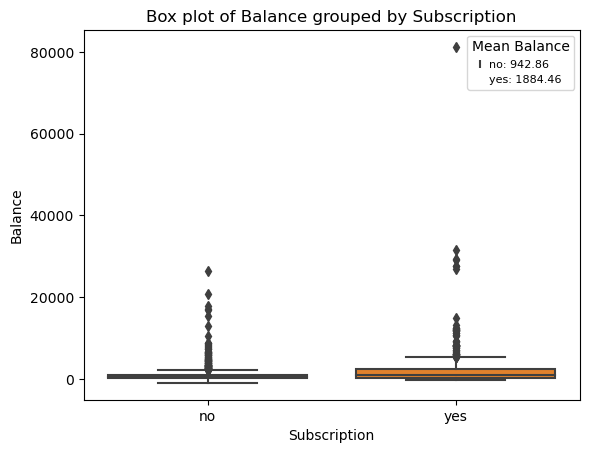

In [64]:
# Create the box plot
sns.boxplot(x='subscribed', y='balance', data=df1)

# Calculate the mean balance for each subscription status
mean_balance_subscription = df1.groupby('subscribed')['balance'].mean()

# Add mean balance labels to the legend
legend_labels = [f'{subscription_status}: {mean_balance:.2f}' for subscription_status, mean_balance in mean_balance_subscription.items()]

# Set the title and labels
plt.title('Box plot of Balance grouped by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Balance')

# Create the legend without handles (little pictures)
plt.legend(legend_labels, title='Mean Balance', loc='upper right', fontsize=8, handlelength=0)

# Show the plot
plt.show()


**Observations:**

- Although hard to seein the boxplots, people who subscribed do have higher bank balances on average. Although, there are significant outliers in balance especially with one person who subscribed with a far bigger balance than anyone else. 

/var/folders/nf/4wc9544n4vn1fsh67xg05_kh0000gn/T/ipykernel_4152/713436128.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legend_labels = [f'{education_labels[j]}: {mean_balance_education[j]:.2f}' for j in range(len(mean_balance_education))]
/var/folders/nf/4wc9544n4vn1fsh67xg05_kh0000gn/T/ipykernel_4152/713436128.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legend_labels = [f'{education_labels[j]}: {mean_balance_education[j]:.2f}' for j in range(len(mean_balance_education))]


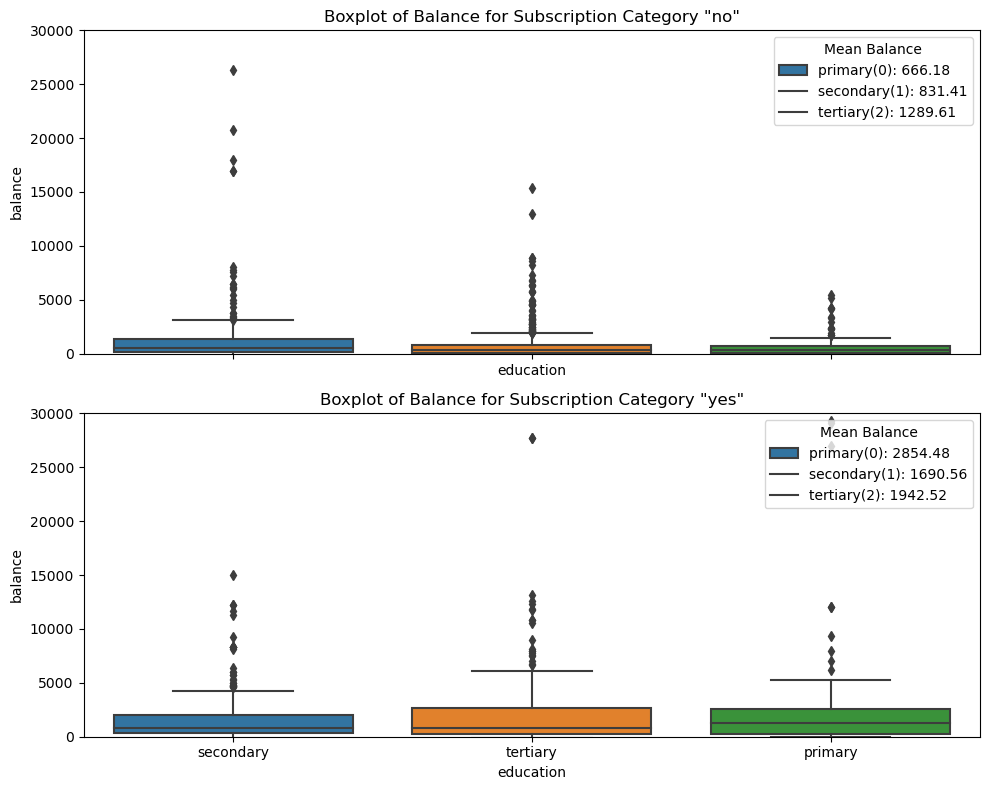

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

education_labels = ['primary(0)', 'secondary(1)', 'tertiary(2)']

# Iterate over each subscription category
for i, subscription_category in enumerate(['no', 'yes']):
    # Filter the data by subscription category
    subscription_data = df1[df1['subscribed'] == subscription_category]

    # Create boxplot for each education level within the current subscription category
    sns.boxplot(x='education', y='balance', data=subscription_data, ax=axes[i])

    # Set title for the subplot
    axes[i].set_title(f'Boxplot of Balance for Subscription Category "{subscription_category}"')

    # Calculate mean balance for each category of education
    mean_balance_education = subscription_data.groupby('education')['balance'].mean()
    
    # Add mean balance to legend
    legend_labels = [f'{education_labels[j]}: {mean_balance_education[j]:.2f}' for j in range(len(mean_balance_education))]
    axes[i].legend(legend_labels, title='Mean Balance', loc='upper right')

    # Set the y-axis limits to be the same for both plots
    axes[i].set_ylim(0, 30000)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



**Observations:**

 - again education plays an role  in that those with higher education, tend to have higher bank balances and  tend to subscribe. However, we dont know the main reason why people do not subscribe

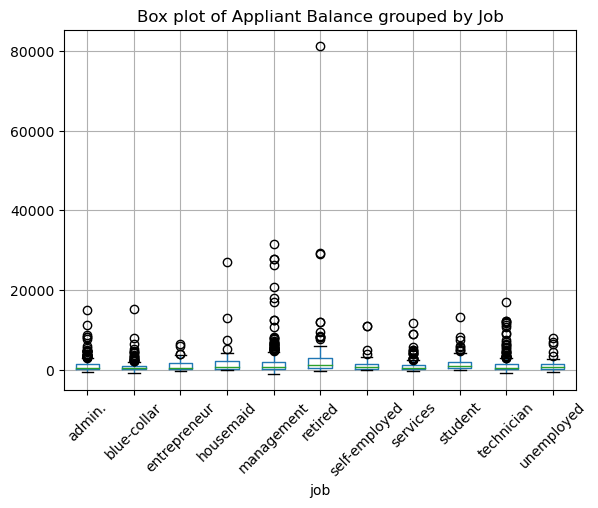

The average balance amount: job
blue-collar       737.295302
services         1042.030303
entrepreneur     1143.000000
unemployed       1158.028986
admin.           1180.283401
technician       1199.683908
self-employed    1251.734375
student          1591.760417
management       1768.227766
housemaid        2327.914286
retired          2792.456790
Name: balance, dtype: float64


In [66]:
df1.boxplot(column='balance', by='job')
plt.xticks(rotation=45)
plt.title('Box plot of Appliant Balance grouped by Job')
plt.suptitle("") 
plt.show()

mean_balance_job = df1.groupby('job')['balance'].mean().sort_values()
print("The average balance amount:", mean_balance_job)

**Observations:**

- Its not surprising that retiries have the largest bank balance, but how about housemaids having the second largest!
- This result is partly down to outliers dragging up the mean. 

We saw a negative realtionship between `pdays` and `duration` in the corrlation matrix. The shorter the call, the longer its been since we've contacted the client. lets examine this further with a scatterplot


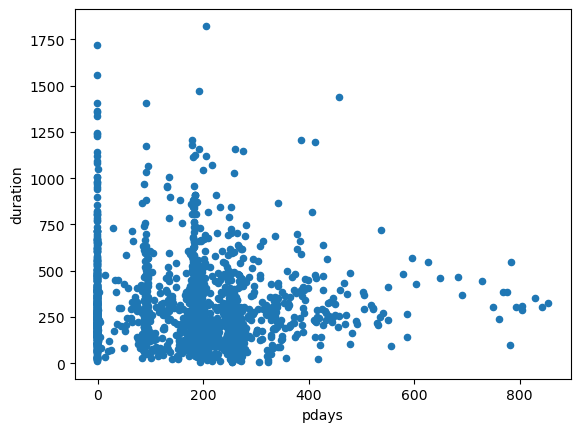

In [67]:
df1.plot.scatter(x='pdays', y='duration')
plt.show()

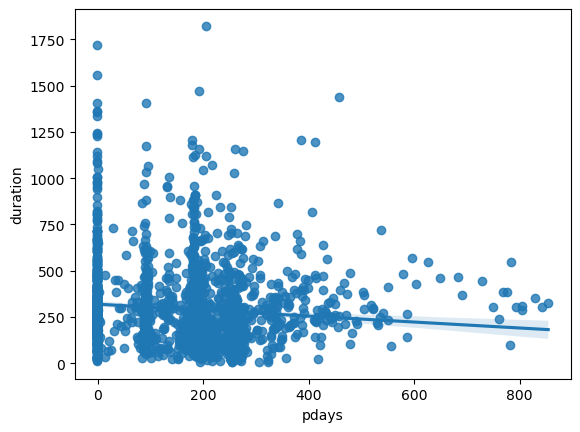

In [68]:
sns.regplot(data=df1, x='pdays', y='duration')
plt.show()

### Q1.b What is the average number of contacts performed during successful campaigns versus unsuccessful ones?

Reach and frequency are core ideas in sales and marketing. Frequency refers to the number of times a person sees an ad. The more often a person sees an ad, the more likely they are to remember it or be persuaded by it.  How important is it in this dataset?

In [367]:
# Group the data by 'subscribed' and 'campaign' and calculate the average number of contacts
average_contacts = df1.groupby(['subscribed'])['campaign'].mean().reset_index()

# Separate the data for successful and unsuccessful campaigns
successful_campaigns = average_contacts[average_contacts['subscribed'] == 'yes']
unsuccessful_campaigns = average_contacts[average_contacts['subscribed'] == 'no']

# Print the average number of contacts for successful campaigns
print("Average number of contacts for successful campaigns:")
print(successful_campaigns)

# Print the average number of contacts for unsuccessful campaigns
print("\nAverage number of contacts for unsuccessful campaigns:")
print(unsuccessful_campaigns)

Average number of contacts for successful campaigns:
  subscribed  campaign
1        yes     1.862

Average number of contacts for unsuccessful campaigns:
  subscribed  campaign
0         no     1.957


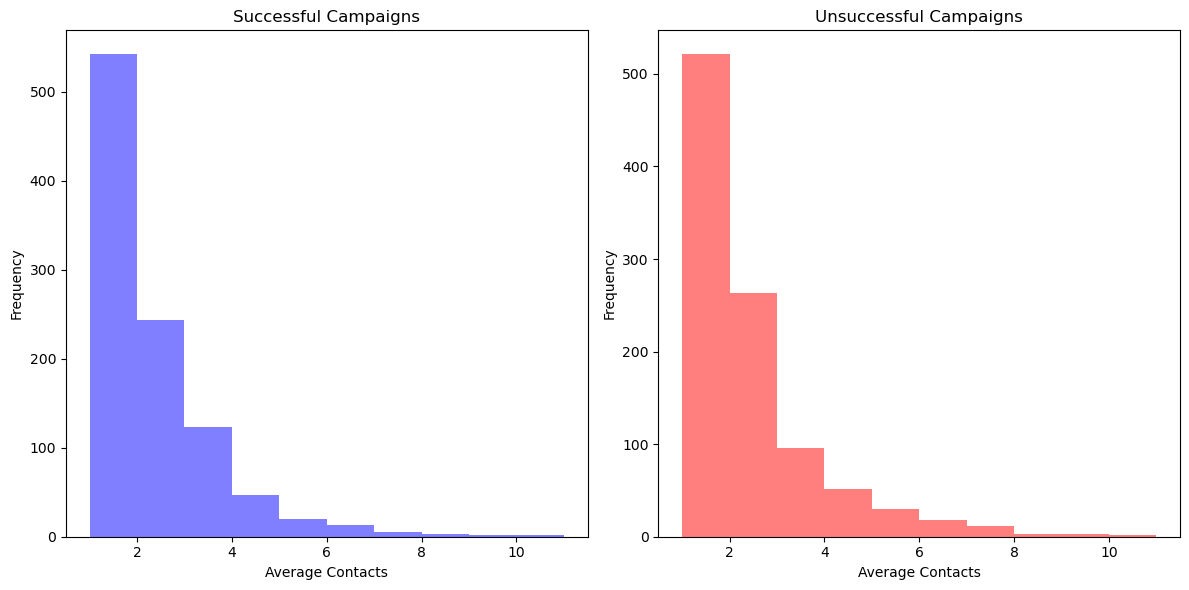

In [368]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Filter DataFrame for successful campaigns
successful_campaigns = df1[df1['subscribed'] == 'yes']

# Plot histogram for successful campaigns
axes[0].hist(successful_campaigns['campaign'], bins=10, color='blue', alpha=0.5)
axes[0].set_title('Successful Campaigns')
axes[0].set_xlabel('Average Contacts')
axes[0].set_ylabel('Frequency')

# Filter DataFrame for unsuccessful campaigns
unsuccessful_campaigns = df1[df1['subscribed'] == 'no']

# Plot histogram for unsuccessful campaigns
axes[1].hist(unsuccessful_campaigns['campaign'], bins=10, color='red', alpha=0.5)
axes[1].set_title('Unsuccessful Campaigns')
axes[1].set_xlabel('Average Contacts')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



**Observations:**

- The average number of contacts is pretty similar for successful and unsuccessful campaigns
  - Average number of contacts for successful campaigns:  1.862
  - Average number of contacts for unsuccessful campaigns:  1.957

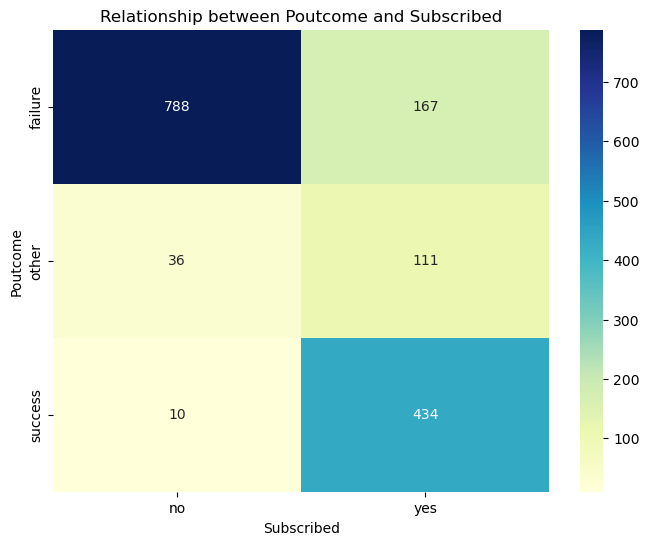

In [71]:
# Create a cross-tabulation of poutcome and subscribed
cross_tab = pd.crosstab(df1['poutcome'], df1['subscribed'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Relationship between Poutcome and Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Poutcome')
plt.show()

**Observations:**
-  Beyond the obvious outcomes of more people didnt subscribe previously, didnt subscribe now, or people who did subscribe previous do subscribe now. 

- **167 people** who did not subscribe previously, did subscriibe in this campaign





## E. Distribution Analysis for Categorical Attributes

Categorical Variables:

- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- subscribed

Let's look at frequency tables for each of the categorical variables beginning with `Job`

In [72]:
frequency_table_job = df1['job'].value_counts(ascending=True)
print('Frequency table for Jobs:')
print(frequency_table_job)

Frequency table for Jobs:
job
housemaid         35
entrepreneur      45
self-employed     64
unemployed        69
student           96
retired          162
services         165
admin.           247
blue-collar      298
technician       348
management       461
Name: count, dtype: int64


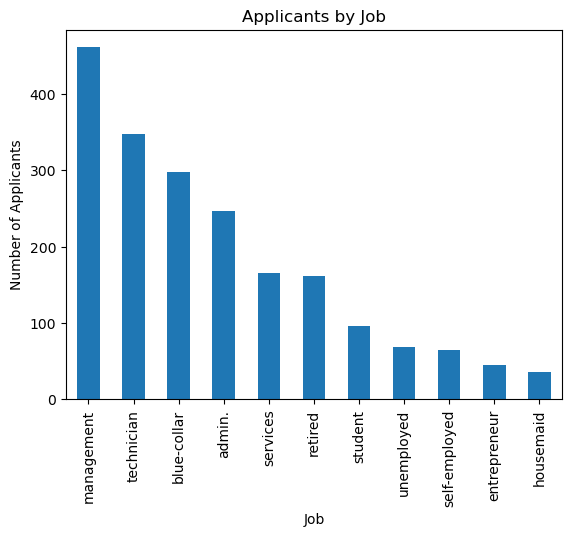

Frequency table for Job:
job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64



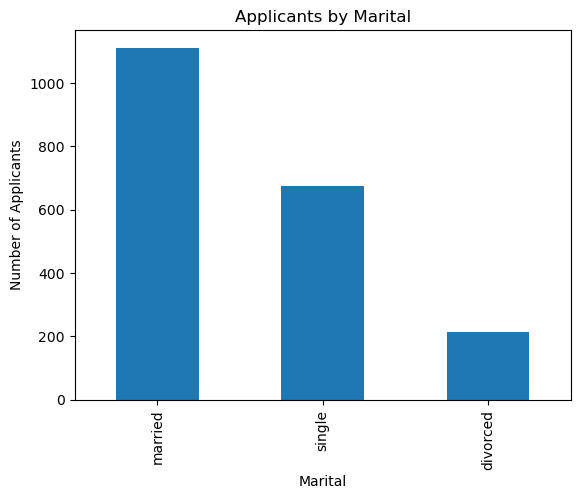

Frequency table for Marital:
marital
married     1111
single       674
divorced     215
Name: count, dtype: int64



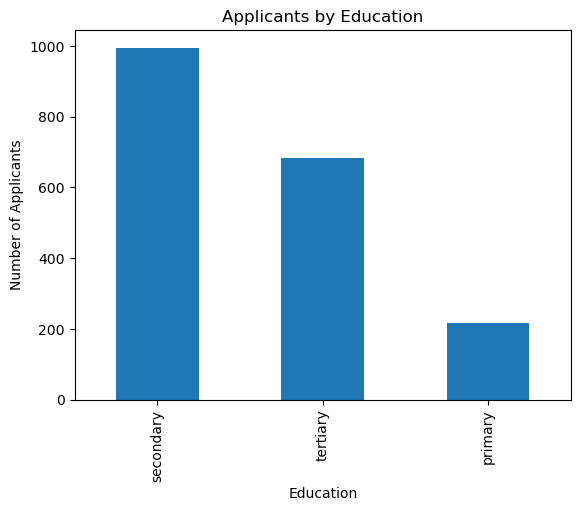

Frequency table for Education:
education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64



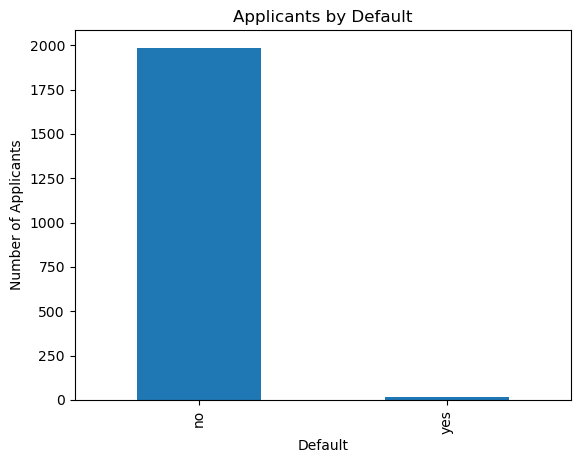

Frequency table for Default:
default
no     1985
yes      15
Name: count, dtype: int64



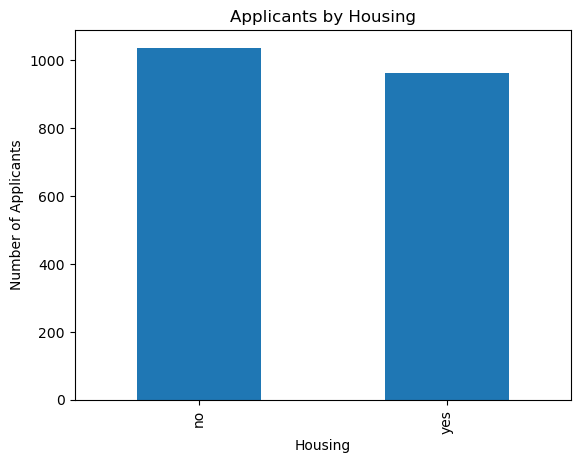

Frequency table for Housing:
housing
no     1037
yes     963
Name: count, dtype: int64



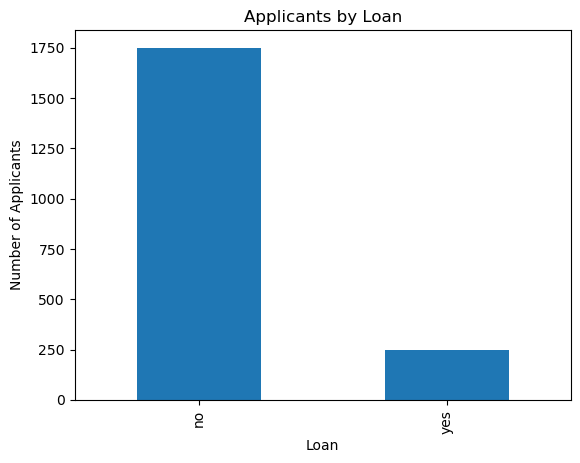

Frequency table for Loan:
loan
no     1750
yes     250
Name: count, dtype: int64



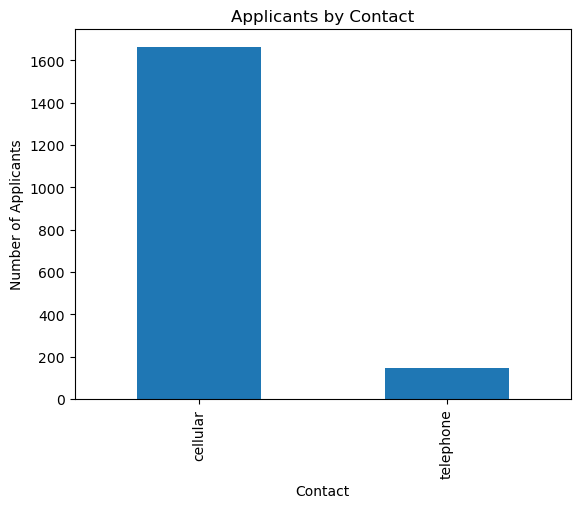

Frequency table for Contact:
contact
cellular     1663
telephone     146
Name: count, dtype: int64



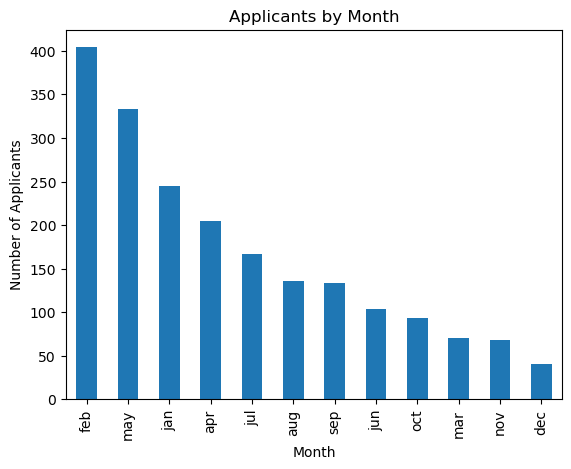

Frequency table for Month:
month
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: count, dtype: int64



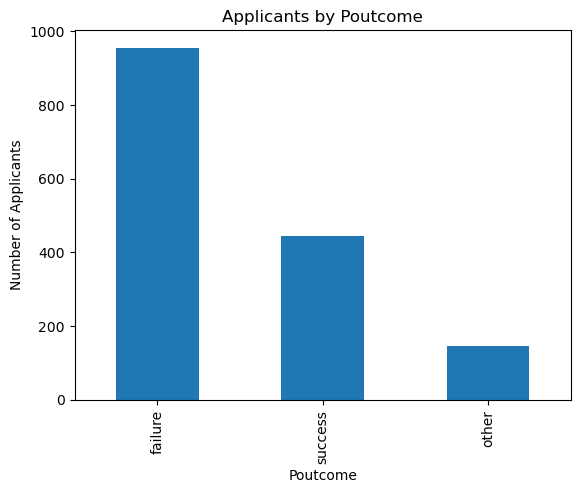

Frequency table for Poutcome:
poutcome
failure    955
success    444
other      147
Name: count, dtype: int64



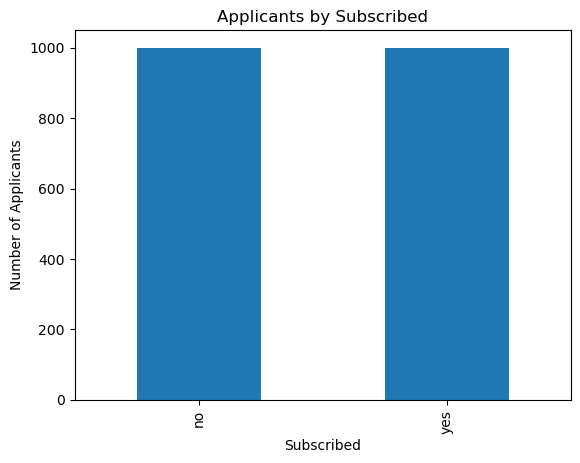

Frequency table for Subscribed:
subscribed
no     1000
yes    1000
Name: count, dtype: int64



In [73]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

for variable in categorical_variables:
    # Create a frequency table for the current variable
    frequency_table = df1[variable].value_counts()
    
    # Plot the frequency table
    frequency_table.plot(kind='bar')
    
    # Set labels and title
    plt.xlabel(variable.capitalize())  # Capitalize the variable name for xlabel
    plt.ylabel('Number of Applicants')
    plt.title(f'Applicants by {variable.capitalize()}')
    
    # Show the plot
    plt.show()
    
     # Print the frequency table with variable name
    print(f'Frequency table for {variable.capitalize()}:')
    print(frequency_table)
    print()  # Print an empty line for separation

Let's look at `Martial Status`

In [74]:
frequency_table_marital = df1['marital'].value_counts(ascending=True)
print('Frequency table for marital:')
print(frequency_table_marital)

Frequency table for marital:
marital
divorced     215
single       674
married     1111
Name: count, dtype: int64


Let's look at `Education`

In [75]:
frequency_table_education = df1['education'].value_counts(ascending=True)
print('Frequency table for education:')
print(frequency_table_education)

Frequency table for education:
education
primary      217
tertiary     684
secondary    995
Name: count, dtype: int64


Let's look at `Default` first, person has credit in default? (binary: "yes","no")


In [76]:
frequency_table_default = df1['default'].value_counts(ascending=True)
print('Frequency table for Defaults:')
print(frequency_table_default)

Frequency table for Defaults:
default
yes      15
no     1985
Name: count, dtype: int64


Let's look at `Housing`

In [77]:
frequency_table_housing = df1['housing'].value_counts(ascending=True)
print('Frequency table for housing:')
print(frequency_table_housing)

Frequency table for housing:
housing
yes     963
no     1037
Name: count, dtype: int64


Let's look at `Loan`

In [78]:
frequency_table_loan = df1['loan'].value_counts(ascending=True)
print('Frequency table for loan:')
print(frequency_table_loan)

Frequency table for loan:
loan
yes     250
no     1750
Name: count, dtype: int64


Let's look at `Contact`

In [79]:
frequency_table_contact = df1['contact'].value_counts(ascending=True)
print('Frequency table for contact:')
print(frequency_table_contact)

Frequency table for contact:
contact
telephone     146
cellular     1663
Name: count, dtype: int64


Let's look at `Month`

In [80]:
frequency_table_month = df1['month'].value_counts(ascending=True)
print('Frequency table for month:')
print(frequency_table_month)

Frequency table for month:
month
dec     41
nov     68
mar     70
oct     93
jun    104
sep    134
aug    136
jul    167
apr    205
jan    245
may    333
feb    404
Name: count, dtype: int64


Let's look at `poutcome`

In [81]:
frequency_table_poutcome = df1['poutcome'].value_counts(ascending=True)
print('Frequency table for poutcome:')
print(frequency_table_poutcome)

Frequency table for poutcome:
poutcome
other      147
success    444
failure    955
Name: count, dtype: int64


Finally, let's see `Subscribed`, whether the person subscribed to a term deposit (binary: "yes","no"). 

In [82]:
frequency_table_subscribed = df1['subscribed'].value_counts(ascending=True)
print('Frequency table for subscriptions:')
print(frequency_table_subscribed)

Frequency table for subscriptions:
subscribed
no     1000
yes    1000
Name: count, dtype: int64


## Q2. I was interested in how bank balances might vary by education and job


**Education:**
The average balance amount doesn't seem to change per educational level, which is surprising. People with tertiary level education do have a bigger balance. But bank balances for tertiary and primary are similar.I might have expected balance to increase with education but the mean for secondary education is lower. We see one massive outlier in secondary education.

**Balance grouped by subscription:** 
People who subscribed have higher bank balances on average. Although, there are significant outliers in balance especially with one person who subscribed with a far bigger balance than anyone else. Again education plays a role in that those with higher education, tend to have higher bank balances and tend to subscribe. However, we do not know the main reason why people do not subscribe.


**Balance grouped by Job:**
It's not surprising that retirees have the largest bank balance, but how about housemaids having the second largest? This result is partly down to outliers dragging up the mean.


**Communication frequency and campaign success:**
I went into this data set with a presumption that frequency was important for campaign success and found the average number of contacts is pretty similar for successful (1.862) and unsuccessful campaigns ( 1.957). 


**Task2: Data Preparation**
- encoded all categorical attributes as numerical,
- filled in all missing values,
- applied a scaler to rescale features,
- treated outliers and skewed attribute distribution appropriately,
- created at least one new feature from the existing ones.

## F. Treatment of Missing Values

I'm going to impute missing variables first then encode them.

We first need to figure out  **how do we handle missing values?**  and **when do we delete a variable** and **when to impute missing values?** 

Some helpful questions to reflect on are:
- How important are the variables to our main question?
- How large a % are the missing values for the variables 
    - "When more than 15% of the data is missing, we should delete the corresponding variable"
    -  If all the classes to be predicted are sufficiently represented in the training data, then try deleting the missing value observations
- Asking why the values are missing and "how random missing values are."


Once we come to an decision on the missing values we can choose an appropriate strategy to handle them:
- Delete the missing observations
- Delete the variable which is having missing values
- Replace missing values with the most frequent value
- Develop a model to predict missing values




In [83]:
# Calculate the total number of missing values
total_missing = df1.isna().sum()

# Calculate the percentage of missing values
percent_missing = (total_missing / len(df1)) * 100

# Create a DataFrame to store the missing data information
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

# Sort the missing data DataFrame by the number of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Total', ascending=False)

# Display the top 20 rows of the sorted missing data DataFrame
print(missing_data_sorted.head(20))

            Total  Percent
poutcome      454    22.70
contact       191     9.55
education     104     5.20
age            12     0.60
job            10     0.50
default         0     0.00
balance         0     0.00
housing         0     0.00
loan            0     0.00
day             0     0.00
month           0     0.00
duration        0     0.00
campaign        0     0.00
pdays           0     0.00
previous        0     0.00
marital         0     0.00
subscribed      0     0.00


#### F. Treatment of Missing Values for numerical columns

In [84]:
numerical = df1.dtypes[(df1.dtypes == 'float64')|(df1.dtypes ==  'int64')].index.tolist()
print("Numerical Variables:")
for col in numerical:
    print(col)

Numerical Variables:
age
balance
day
duration
campaign
pdays
previous


## G. Encoding all categorical attributes as numerical

**CAUTION:Mess Ahead**

- I've rerun all the cells in the notebook which re-executed the code for imputing missing values even though they were already imputed in a previous run. Then I dropped a column and created an unholy mess. 

- As a result I needed to reload the dataset in certain cells. 

With that in mind, lets continue:

Here is a review of the categorical variables we're working with

In [85]:
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In order to encode them appropriately it helps to know what kind of categorical data types we're using:
- Nominal (name) : Job, Marital, Default, housing, loan,contact, subscribed
- Ordinal (position) : Education 
- Cycical:  Month

In [192]:
df1 = pd.read_csv('bank.csv')


Use MissingIndicator to create new binary features (typically 0 or 1) to represent whether the original data point has a missing value for that specific category.

We can then use SimpleImputer to replace the missing values.

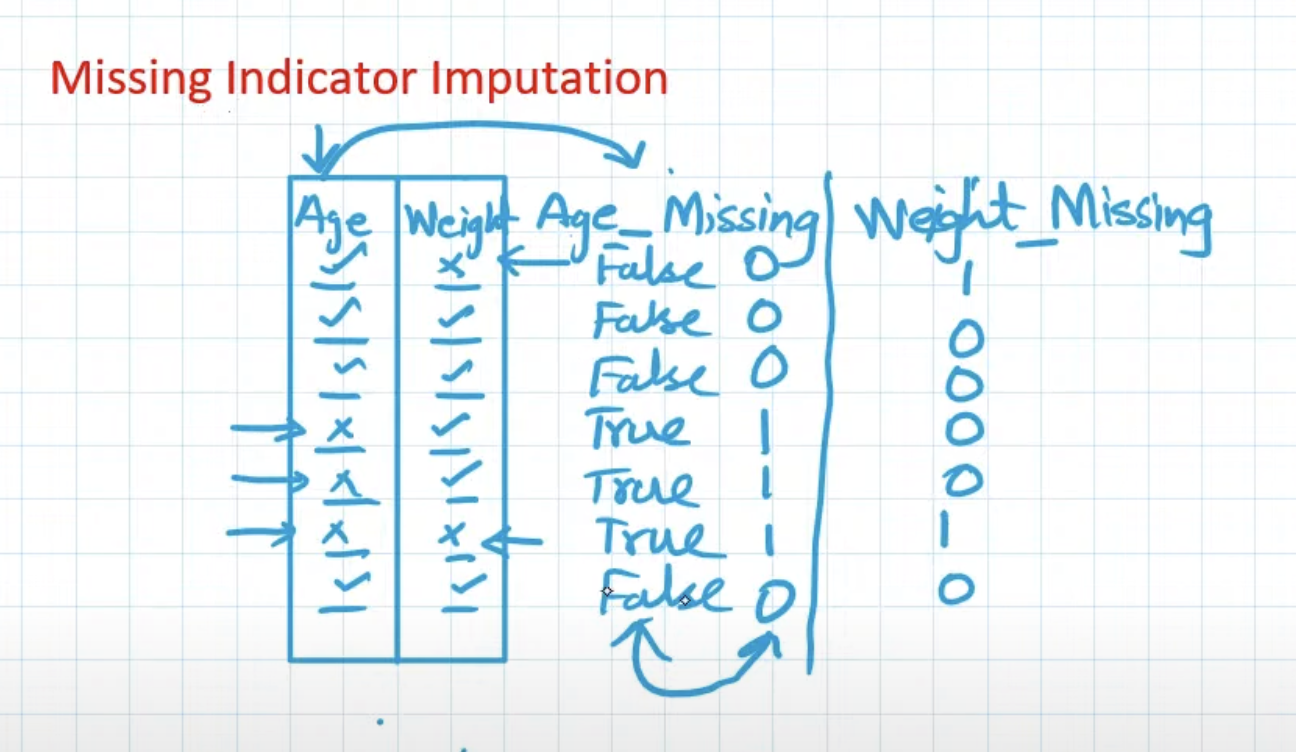

In [187]:
from sklearn.impute import MissingIndicator

indicator = MissingIndicator()

indicator_data = indicator.fit_transform(df1)

num_cols = indicator_data.shape[1]

indicator_df = pd.DataFrame(indicator_data, columns=[f'missing_{col}' for col in df1.columns[:num_cols]])

num_cols

5

In [373]:
total_missing = indicator_df1.sum(axis=0)


total_entries = len(indicator_df1)

percentage_missing = (total_missing / total_entries) * 100


missing_info_df = pd.DataFrame({
    'Column': total_missing.index,
    'Total Missing': total_missing.values,
    'Percentage Missing': percentage_missing.values
})


missing_info_df = missing_info_df1.sort_values(by='Percentage Missing', ascending=False)
print(missing_info_df.head())


              Column  Total Missing  Percentage Missing
4    missing_default            454               22.70
3  missing_education            191                9.55
2    missing_marital            104                5.20
0        missing_age             12                0.60
1        missing_job             10                0.50


**Observations**

- There are lot of missing values for `defaults`. The question phrases as "default: has credit in default? (binary: "yes","no")". 
- Any bank looking for new prospective customer which they could upsell loans to would be interested in this information.
- This is a sensitive question, customers might have been unwilling to share over the phone.



In [378]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer for each variable with the respective strategy
imputer_age = SimpleImputer(strategy='mean')
imputer_job = SimpleImputer(strategy='most_frequent')
imputer_marital = SimpleImputer(strategy='most_frequent')
imputer_education = SimpleImputer(strategy='most_frequent')
imputer_default = SimpleImputer(strategy='constant', fill_value='Unknown')



### Justification:###

- `age`: I've chosen the mean for age. as Median 38.0 and mean 41.75 are both very similar. 

- `job`, `marital`, `education`:The mode seems the least disruptive strategy. I'm assuming the missing values are more likely to be similar to the the most frequent values. 

- `default`: Given how important credit history generally is I think its best not to presume an answer when we dont have the information and simply acknowledge we dont know but should follow up, hence fill_value 'unknown'

In [384]:
# Define the variables to impute
variables_to_impute = ['age', 'job', 'marital', 'education', 'default']

imputers = {
  'age': imputer_age,
  'job': imputer_job,
  'marital': imputer_marital,
  'education': imputer_education,
  'default': imputer_default
}

# Fit and transform each imputer to impute the missing values
df_imputed = df1.copy()

# Loop through variables and impute
for var in variables_to_impute:
  # Access the imputer using the dictionary
  imputer = imputers[var]
  # Impute all variables using first column of transformed data
  df_imputed[var] = imputer.fit_transform(df1[[var]])[:, 0]

# Check if there are any missing values remaining after imputation
missing_after_imputation = df_imputed[variables_to_impute].isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)


Missing values after imputation:
age          0
job          0
marital      0
education    0
default      0
dtype: int64


### G1. Tranform `Education`  with an OrdinalEncoder 

In [214]:


from sklearn.preprocessing import OrdinalEncoder
education_column = df_imputed['education']

# Reshape the data into a 2D array with one column
education_data = education_column.values.reshape(-1, 1)

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Transform the 'education' column
education_encoded = encoder.fit_transform(education_data)

# Replace the original 'education' column with the encoded values
df['education'] = education_encoded

In [215]:
frequency_table_education_encoded = df['education'].value_counts(ascending=True)
print('Frequency table for education:')
print(frequency_table_education_encoded)

Frequency table for education:
education
0.0     217
2.0     684
1.0    1099
Name: count, dtype: int64


After imputation:

- primary(0) = stayed the same on 217
- secondary(1) = dereased to 684 from 995
- tertiary(2)= increased to 1099 from 684 

In [216]:
df['education'].isna().sum()

0

### G2. Tranform the remaining nominal variables with a OneHotEncoder

In [217]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df_imputed, drop_first=True)


df.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2            False   
1  39.0      688    1       233         2    133         1            False   
2  59.0     1035    1       126         2    239         1            False   
3  47.0      398    1       274         1    238         2             True   
4  54.0     1004    1       479         1    307         1            False   

   job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
0             False          False  ...      False      False      False   
1             False          False  ...      False      False      False   
2             False          False  ...      False      False      False   
3             False          False  ...      False      False      False   
4             False          False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False      False      False      False           False   
1      False      False      False      False           False   
2      False      False      False      False           False   
3      False      False      False      False           False   
4      False      False      False      False           False   

   poutcome_success  subscribed_yes  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False  

[5 rows x 39 columns]

### G3. Cyclical Encoding

The `day` and `month` variables are a cyclical variable and must be encoded in such a way that higher values of the variable are closer to lower values.

In [218]:
!pip install feature-engine

from feature_engine.creation import CyclicalFeatures


In [219]:
# Transform day
day_columns = [col for col in df.columns if 'day' in col.lower()]

# Create the CyclicalFeatures transformer for all 'month' columns
cyclical_day = CyclicalFeatures(variables= day_columns, drop_original=False)

# Fit and transform all columns
cyclical_day = cyclical_day.fit_transform(df[day_columns])

cyclical_day.head()

day  pdays   day_sin  day_cos  pdays_sin  pdays_cos
0    1    131  0.201299  0.97953   0.821373   0.570391
1    1    133  0.201299  0.97953   0.829677   0.558244
2    1    239  0.201299  0.97953   0.982452  -0.186514
3    1    238  0.201299  0.97953   0.983798  -0.179281
4    1    307  0.201299  0.97953   0.772573  -0.634926

In [220]:
cyclical_day.isna().sum()

day          0
pdays        0
day_sin      0
day_cos      0
pdays_sin    0
pdays_cos    0
dtype: int64

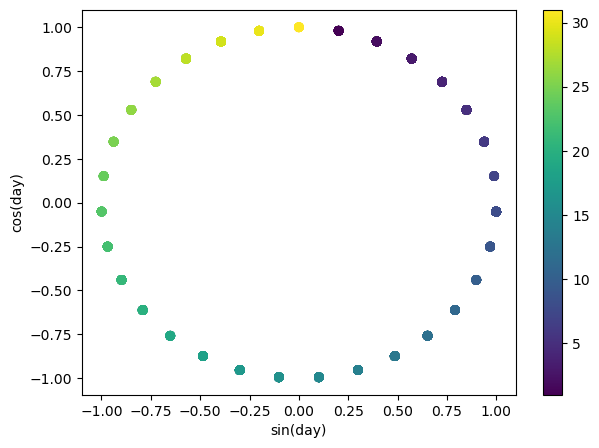

In [221]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(cyclical_day["day_sin"], cyclical_day["day_cos"], c=cyclical_day["day"])
ax.set(
    xlabel="sin(day)",
    ylabel="cos(day)",
)
_ = fig.colorbar(sp)

In [247]:
# 1) Reload the data set
df1 = pd.read_csv('bank.csv')

# 2) Extract the month variable 
month_col = [col for col in df1.columns if 'month' in col.lower()]

if month_col:
    month_data = df1[month_col.pop()]  
else:
    print("Error: No column containing 'month' found in the data")

# 3) Handle missing values 
month_data = month_data.fillna('missing_month')

# 4) Encode the month numerically
le = LabelEncoder()
month_data_encoded = le.fit_transform(month_data)

# 5) Use the cyclical encoder
cyclical_month = CyclicalFeatures(variables=['month'], drop_original=False)
month_data_cycled = cyclical_month.fit_transform(pd.DataFrame({'month': month_data_encoded}))


print("Original Month Data:\n", df1[month_col])  
print("\nCyclical Encoded Month Features:\n", month_data_cycled)


Original Month Data:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2000 rows x 0 columns]

Cyclical Encoded Month Features:
       month     month_sin  month_cos
0         0  0.000000e+00        1.0
1         0  0.000000e+00        1.0
2         0  0.000000e+00        1.0
3         0  0.000000e+00        1.0
4         0  0.000000e+00        1.0
...     ...           ...        ...
1995     11 -2.449294e-16        1.0
1996     11 -2.449294e-16        1.0
1997     11 -2.449294e-16        1.0
1998     11 -2.449294e-16        1.0
1999     11 -2.449294e-16        1.0

[2000 rows x 3 columns]


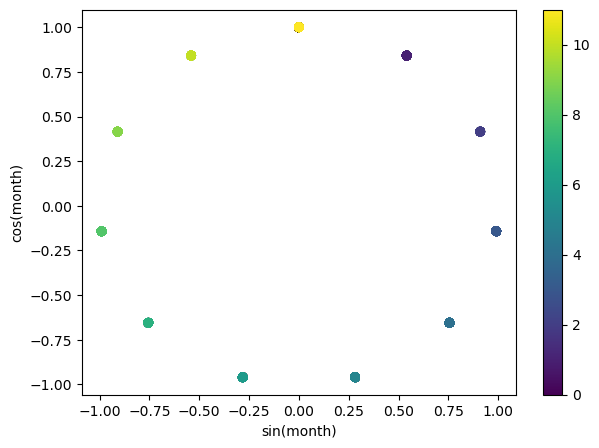

In [250]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(month_data_cycled["month_sin"], month_data_cycled["month_cos"], c=month_data_cycled["month"])
ax.set(
    xlabel="sin(month)",
    ylabel="cos(month)",
)
_ = fig.colorbar(sp)

## H. Rescaling Features

- applied a scaler to rescale features,


I first detected outliers using the conventional Q3/Q1 +/- scale of 1.5 * IQR. Although I note I see some peers defining outliers as 3 * IQR.  

My plan is to use RobustScaler on numerical variables with outliers. 'Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).'



In [272]:
data = df
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# List of numerical variables
numerical_variables = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identify numerical variables with outliers
variables_with_outliers = []
for var in numerical_variables:
    if detect_outliers_iqr(df[var]).any():
        variables_with_outliers.append(var)

# Print the list of numerical variables with outliers
print("Numerical variables with outliers:")
for var in variables_with_outliers:
    print(var)


Numerical variables with outliers:
age
balance
duration
campaign
pdays
previous


In [345]:
#Robust scaler
from sklearn.preprocessing import RobustScaler

numerical_cols = ['age', 'balance', 'duration', 'pdays', 'previous', 'campaign']

robust_scaler = RobustScaler()

df_scaled = robust_scaler.fit_transform(df[numerical_cols])

/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

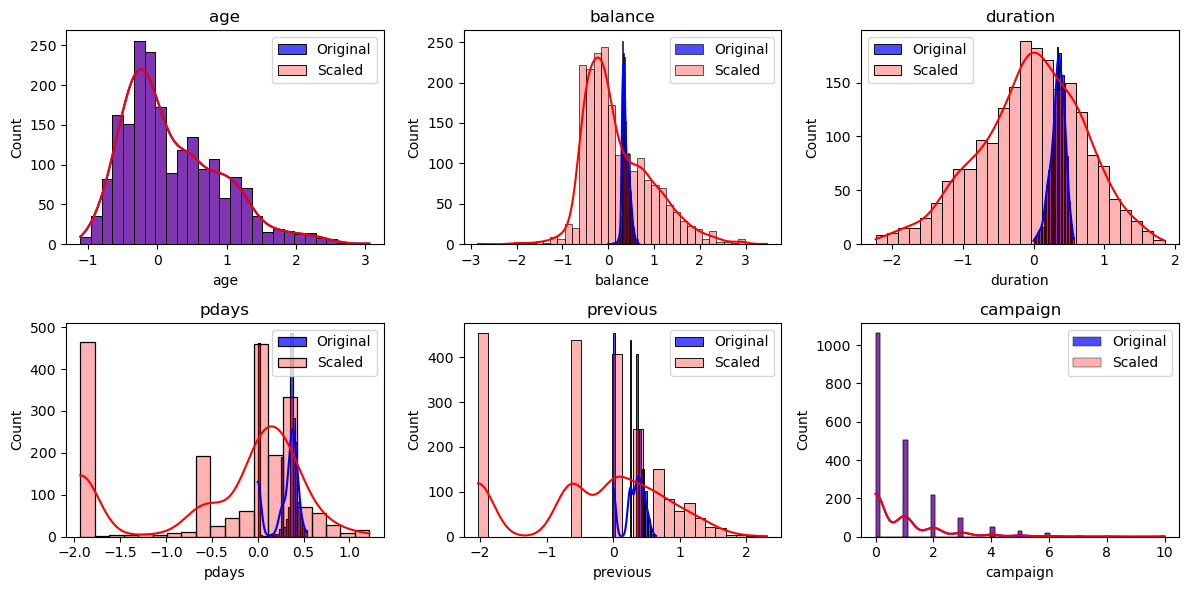

In [353]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(12, 6))
rows, cols = 2, 3

for i, col_name in enumerate(numerical_cols):
    plot_index = i + 1
    plt.subplot(rows, cols, plot_index)
    sns.histplot(df[col_name], kde=True, color='blue', alpha=0.7, label='Original')
    sns.histplot(df_scaled[col_name], kde=True, color='red', alpha=0.3, label='Scaled')
    plt.title(col_name)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
sns.histplot(df[col_name], kde=True, color='blue', alpha=0.7, label='Original')
    sns.histplot(df_scaled[col_name], kde=True, color='red', alpha=0.3, label='Scaled')

## I. Treatment of Outliers

Treat outliers and skewed attribute distribution appropriately

/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

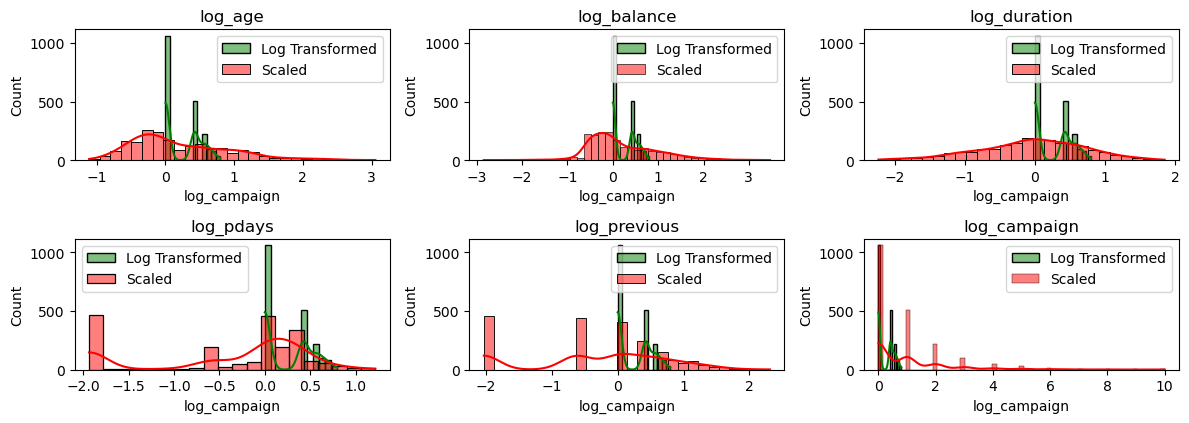

In [387]:
variables_outliers = ['age', 'balance', 'duration', 'pdays', 'previous', 'campaign']


# Use a log transformation to create new columns
for var in variables_outliers:
    # Create new column for log-transformed data
    log_trans = f"log_{var}"  # Naming convention for log-transformed variable
    df[log_trans] = np.log(df[var] + abs(min(df[var])) + 1)
    
    
# Plotting using the log-transformed columns
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables_outliers):
    log_varname = f"log_{var}"  # Corresponding log-transformed column name
    plt.subplot(3, 3, i+1)
    sns.histplot(df[log_trans], kde=True, color='green', alpha=0.5, label='Log Transformed')
    sns.histplot(df_scaled[var], kde=True, color='red', alpha=0.5, label='Scaled')
    plt.title(log_varname)  # Use log-transformed variable name for subplot title
    plt.legend()

plt.tight_layout()
plt.show()



## J. Create at least one new feature from the existing ones

- **Discretization** takes  a continuous feature and divides it a pre-specified number of categories (bins). 


- It is easier to communicate the info in those histograms by using comprehensible groups e.g; low, medium, and high.  Of course, it would be ideal if those categories were similar to what's in the literature.  



In [359]:
from sklearn.preprocessing import KBinsDiscretizer

variables_outliers = ['balance', 'duration', 'pdays', 'previous']
bin_labels =[ 'low', 'medium', 'high']

disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

for var in variables_outliers:
    var_2d = df[var].values.reshape(-1, 1)
    transformed_data = disc.fit_transform(var_2d)
    discretized_labels = [bin_labels[int(label)]for label in transformed_data.ravel()]
    
    df[f'{var}_discretized'] = transformed_data.astype(int)
    df[f'{var}_labels'] = discretized_labels


print(df[[var, f'{var}_discretized', f'{var}_labels']].head(10))


   previous  previous_discretized previous_labels
0  0.264033                     1          medium
1  0.205929                     1          medium
2  0.205929                     1          medium
3  0.264033                     1          medium
4  0.205929                     1          medium
5  0.293302                     2            high
6  0.205929                     1          medium
7  0.311518                     2            high
8  0.264033                     1          medium
9  0.264033                     1          medium


/Users/paulfagan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/paulfagan/anaconda3/lib/pyt

/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paulfagan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

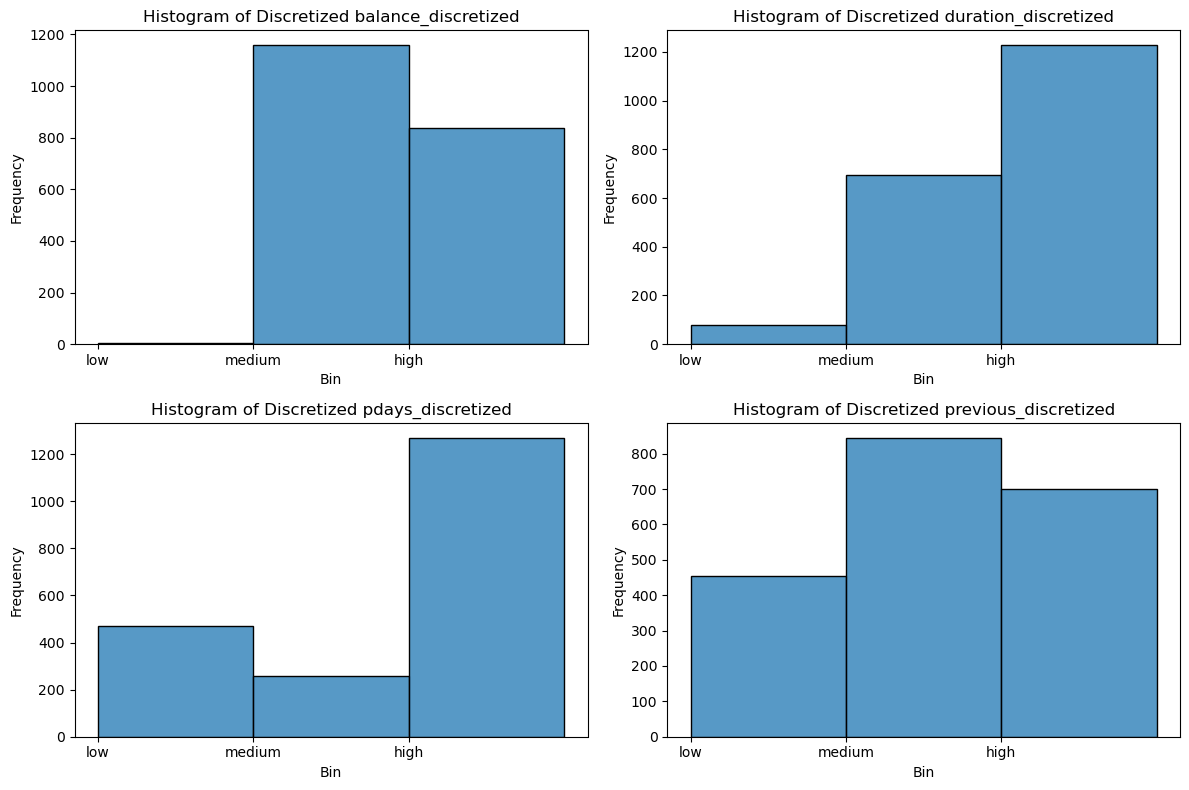

In [362]:
# Define bin edges corresponding to the labels
bin_edges = [0, 1, 2, 3]  # This assumes n_bins=3 for 'low', 'medium', 'high'
bin_labels = ['low', 'medium', 'high']  # Corresponding labels for bins

# Plot histograms of the discretized variables
plt.figure(figsize=(12, 8))

# Iterate over each discretized variable
for i, col in enumerate(disc_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=bin_edges, kde=False)  # Use numeric bin edges
    plt.title(f'Histogram of Discretized {col}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    
    # Set x-axis tick labels to corresponding bin labels
    plt.xticks(bin_edges[:-1], bin_labels)  # Assign labels to bin edges

plt.tight_layout()
plt.show()


## Learnings

- Be careful making multiple passes through your code.

"The error you encountered arises because the CyclicalFeatures transformer expects numerical variables as input, but the columns you passed to it were originally one-hot encoded categorical variables. Even though one-hot encoding represents categorical variables numerically (with 0s and 1s), the resulting columns are still considered categorical in terms of their data type."


## Post (complete by Saturday of Week 8)


**1) a summary of your most interesting discoveries in the bank dataset (max 250 words).**


I was interested in variations in bank balance by education and job

**Education:**
The average balance amount doesn't seem to change per educational level, which is surprising. People with tertiary level education do have a bigger balance. But bank balances for tertiary and primary are similar.I might have expected balance to increase with education but the mean for secondary education is lower. We one massive outlier in secondary education.

**Balance grouped by subscription:** 
People who subscribed have higher bank balances on average. Although, there are significant outliers in balance especially with one person who subscribed with a far bigger balance than anyone else. Again education plays a role in that those with higher education, tend to have higher bank balances and tend to subscribe. However, we do not know the main reason why people do not subscribe


**Balance grouped by Job:**
It's not surprising that retirees have the largest bank balance, but how about housemaids having the second largest? This result is partly down to outliers dragging up the mean.


**Communication frequency and campaign success:**
I went into this data set with a presumption that frequency was important for campaign success and found the average number of contacts is pretty similar for successful (1.862) and unsuccessful campaigns ( 1.957). 



**2) description of how you intend to fill-in missing values, encode and scale data, and treat outliers (max 250 words).**


**Missing values** 

Some helpful questions to reflect on are:
- How important are the variables to our main question?
- How large a % are the missing values for the variables 
- Asking why the values are missing and "how random missing values are."

How?
- Calculate the total number of missing values
- Use MissingIndicator to create new binary features (typically 0 or 1)
- Use SimpleImputer to replace the missing values.
e.g.
Imputer_age = SimpleImputer(strategy='mean')
imputer_job = SimpleImputer(strategy='most_frequent')
imputer_marital = SimpleImputer(strategy='most_frequent')
imputer_education = SimpleImputer(strategy='most_frequent')
imputer_default = SimpleImputer(strategy='constant', fill_value='No')


**Encoding all categorical attributes as numerical**
Learn what kind of categorical data types we're using:
Nominal (name) : Job, Marital, Default, housing, loan,contact, subscribed
Ordinal (position) : Education 
Interval: Month

Tranform  nominal variables with a OneHotEncoder
Tranform ordinarl varibales like `Education`  with an OrdinalEncoder 


**Scale data and treatment outliers** 

Many machine learning models perform more effecyively and efficiently when numerical variables are standardised. Our plan is to use 1) RobustScaler 2) log transformations and 3) Discretation to change our numerical variables with skewed distributions and/or outliers to new data distributions.



**3) description of any features you have created or intend to create and why (max 250 words).**

I created discretized variables for ['balance', 'duration', 'pdays', 'previous'] by transforming their continuous probability distributions with numerical input into disrete probability distributions where numerical values are mapped onto discrete values. 

I chose to a uniform grouping method: 'Each bin has the same width in the span of possible values for the variable.'

